## EDA & Cleaning: Exploring categorical features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Sex`, `Cabin`, and `Embarked` features.**

### Read in data

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# To clean our data for this excercise we drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


### Explore categorical features

Explore `Sex`, `Cabin`, and `Embarked`.

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [14]:
#We have a lot of missing values for Cabin and Embarked  so let's explore if there is something there!
print(titanic.groupby(titanic['Cabin'].isnull()).mean())
print(titanic.groupby(titanic['Embarked'].isnull()).mean())
#So for Cabin there seems to be a relationship between survival and recording, same for Embarked although the sample size is so small it is insignificant

       Survived
Cabin          
False  0.666667
True   0.299854
          Survived
Embarked          
False     0.382452
True      1.000000


In [15]:
#TO CAPTURE THIS VALUE WE HAVE DISCOVERED IN THE MISSING VALUES FOR CABIN WE CREATE A NEW BOOLEAN VARIABLE IF CABIN WAS RECORDED 
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


### Plot categorical features

<Figure size 432x288 with 0 Axes>

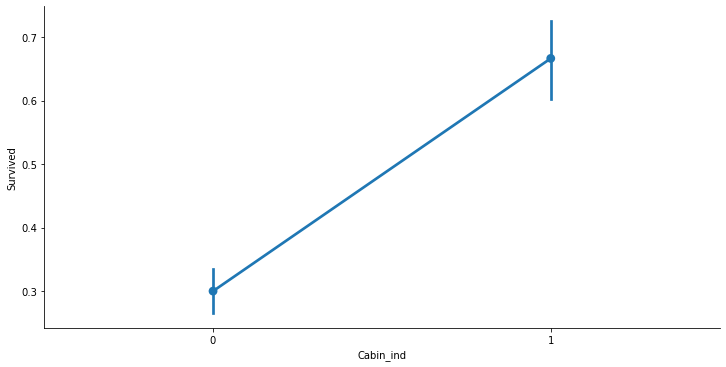

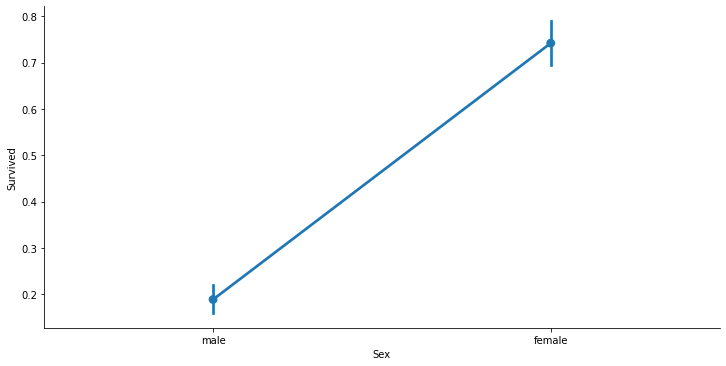

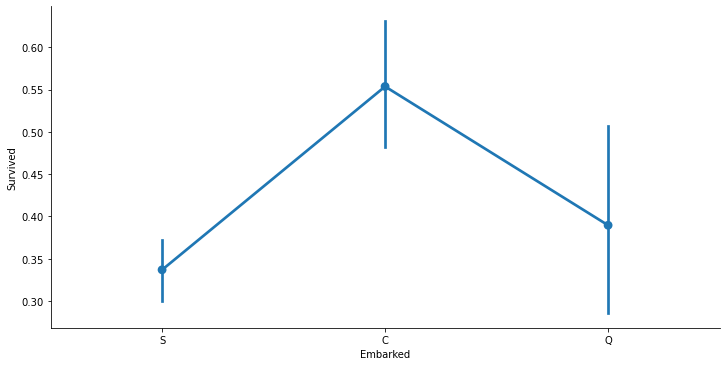

In [16]:
#TO UNDERSTAND SIRVIVALS RELATIONSHIP TO OUR CATAGORICAL VARIABLES WE MAKE PLOTS
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
#AS WE CAN SEE THERE SEEMS TO BE A RELATIONSHIP BETWEEN HAVING CABIN RECORDED, BEING FEMALE AND EMBARKING AT CHERBOURG AND SURVIVAL

In [24]:
#IT SEEMS LIKELY THAT THAT RELATIONSHIP CAPTURED BY THE EMBARKED VARIABLE IS ALREADY CAPTURED IN ONE OF THE OTHER TWO VARIABLES, LETS EXPLORE!
print(titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count'), "\n")
print(titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count'))
#AS YOU CAN SEE THE LOW SURVIVAL RATES OF SOUTHAMPTON EMBARKEES SEEMS TO BE EXPLAINED BY THE HIGH PROPORTION OF MALES AND LOW PROPORTION OF RECORDED CABINS
#AND THE LOW SURVIVAL RATE IN QUEENSTOWN SEEMS TO BE EXPLAINED BY THE EXTREME PROPORTION OF CABINLESS EMBARKEES
#THIS IS RE-ENFORCED BY CHERBOURGS RELATIVE PROPORTIONALITY IN BOTH VARIABLES
#THE CONCLUSION HERE IS THAT EMBARKED IS NOT PROVIDED OUR MODEL WITH MUCH INFO SO IT CAN BE DROPPED TO STREAMLINE

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441 

Embarked    C   Q    S
Cabin_ind             
0          99  73  515
1          69   4  129
